This script demonstrates the Least Squares Approximation

Name : So-Jeong An

Student ID : 2018120203

Github Link : https://github.com/SojeongAn/Assignment07

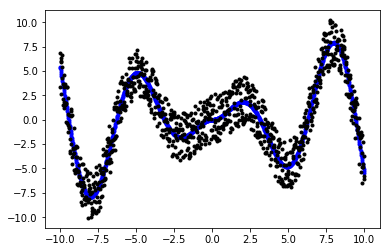

In [202]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n) #편차
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

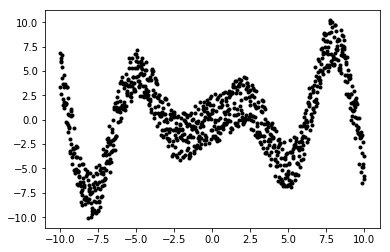

In [203]:
plt.plot(x, y2, 'k.')
plt.show()

# Least square approximation

In [204]:
def computeApproximation(vecX,vecY):
    vecX = np.mat(vecX)
    vecY = np.mat(vecY).T
    xTx = vecX.T * vecX
    if(np.linalg.det(xTx) == 0.0): # if Singular function, return 
        print("This matrix is singular")
        return
    weight = xTx.I * (vecX.T * vecY) # weight
    return weight

# Compute the error:  $\sqrt{(vec1 - vec2)^2} $

In [205]:
def computeError(vec1, vec2):
    error = 0
    for i in range(0, len(vec1)):
        error += np.sqrt((float(vec1[i]) - float(vec2[i]))**2)
    print("random matrix MSE: ", error)        
    return np.sqrt(error)

# Make the A matrix on demension

In [207]:
def func(n):
    dimensions = []; dimenX = []; var = []; weight = []; y = []; y_ = []
    for i in range(0, len(x)):
        dimenX = []
        for j in range(0, n+1):
                dimenX.append(x[i]**j)
        dimensions.append(dimenX)  # Set X0 = 1.0 for computing
    dimensions = np.mat(dimensions)
    weight = computeApproximation(dimensions, y2)
    print('weight:\n', weight)
    for j in range(0, n+1):
        var = []
        var = (x**j)*(float(weight[j]))
        y_.append(var)
    y_ = np.mat(y_)
    y_ = y_.T
    for i in range(0, len(y_)):
        sum_ = np.sum(y_[i])
        y.append(float(sum_))
    return y

# Function for training

In [208]:
def training(n): # N: Dimension 
    error = []; y = []
    y = func(n)
    error = computeError(y2, y)
    Ylabel = n,' dimension'
    visual(x, y, y2)
    return error

# Visualization 

In [209]:
def visual(x, y, y2):
    plt.plot(x, y, 'r', x, y2, 'b.')
    title ='Approximation'
    plt.title(title)
    plt.show()

# Training (dimension is N): $Y =  \theta_1 +  \theta_2 x +  \theta_3 x^2 + \cdot\cdot\cdot+ \theta_n x^{n-1}$

weight:
 [[-2.62638174e-16]]
random matrix MSE:  3223.5602305250013


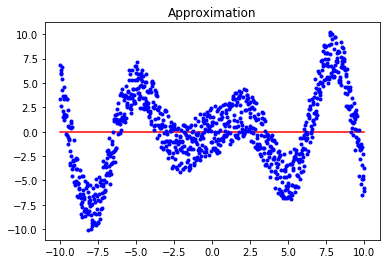

weight:
 [[-1.85295187e-16]
 [ 2.10501191e-01]]
random matrix MSE:  3154.390981652252


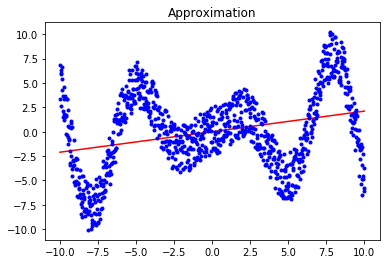

weight:
 [[ 0.00790738]
 [ 0.21050119]
 [-0.00023675]]
random matrix MSE:  3154.379370775982


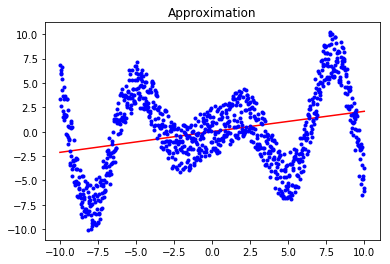

weight:
 [[ 0.00790738]
 [-0.11852474]
 [-0.00023675]
 [ 0.00547283]]
random matrix MSE:  3040.478212001048


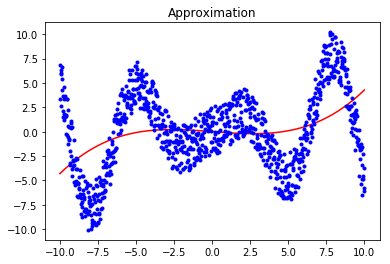

weight:
 [[ 7.37991831e-02]
 [-1.18524738e-01]
 [-6.81280672e-03]
 [ 5.47282712e-03]
 [ 7.65678054e-05]]
random matrix MSE:  3041.5923252197776


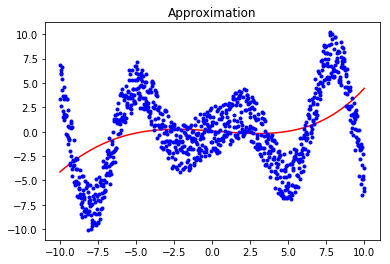

weight:
 [[ 7.37991831e-02]
 [-1.44231184e+00]
 [-6.81280672e-03]
 [ 6.71267031e-02]
 [ 7.65678054e-05]
 [-5.53780645e-04]]
random matrix MSE:  2593.021340994729


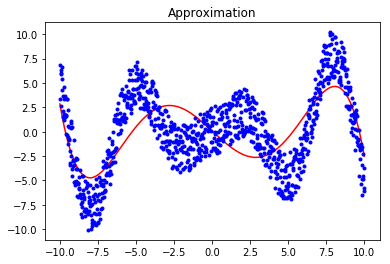

weight:
 [[ 5.05174279e-02]
 [-1.44231184e+00]
 [-1.93333851e-03]
 [ 6.71267031e-02]
 [-6.95256125e-05]
 [-5.53780645e-04]
 [ 1.06922326e-06]]
random matrix MSE:  2592.6635261149036


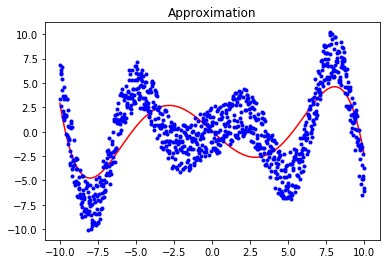

weight:
 [[ 5.05174279e-02]
 [ 4.19844189e-01]
 [-1.93333851e-03]
 [-1.00135492e-01]
 [-6.95256125e-05]
 [ 3.11869655e-03]
 [ 1.06922326e-06]
 [-2.26893065e-05]]
random matrix MSE:  1739.6965775895637


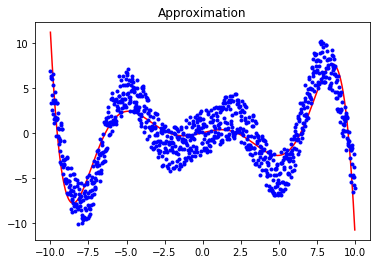

weight:
 [[ 8.50696400e-02]
 [ 4.19844189e-01]
 [-1.43475795e-02]
 [-1.00135492e-01]
 [ 6.11908857e-04]
 [ 3.11869655e-03]
 [-1.07189591e-05]
 [-2.26893065e-05]
 [ 6.30260592e-08]]
random matrix MSE:  1739.8855091191715


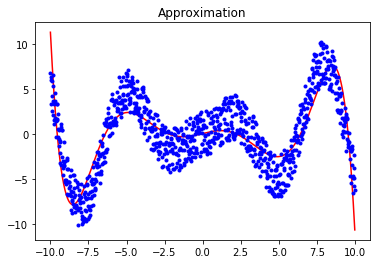

weight:
 [[ 8.50696400e-02]
 [ 2.07087003e+00]
 [-1.43475795e-02]
 [-3.41809207e-01]
 [ 6.11908857e-04]
 [ 1.25254026e-02]
 [-1.07189591e-05]
 [-1.56805897e-04]
 [ 6.30260592e-08]
 [ 6.32078933e-07]]
random matrix MSE:  1308.2653284420994


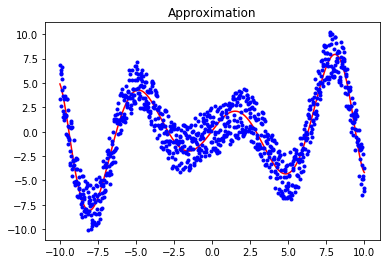

In [210]:
# dimension is N
error = []
for n in range(0, 10):
    err = training(n)
    error.append(err)

# Visualization of MSE

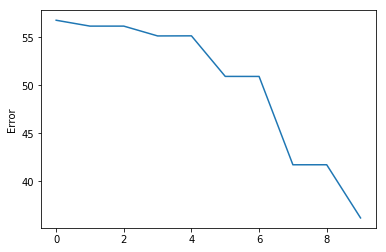

In [211]:
x_axis = np.arange(0, 10, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()